In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-10000-clean-data-eda/Student_performance_10k.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/kaggle/input/students-performance-10000-clean-data-eda/Student_performance_10k.csv')
print("First five rows of the dataset:")
print(df.head())

First five rows of the dataset:
  roll_no gender race_ethnicity parental_level_of_education  lunch  \
0  std-01   male        group D                some college    1.0   
1  std-02   male        group B                 high school    1.0   
2  std-03   male        group C             master's degree    1.0   
3  std-04   male        group D                some college    1.0   
4  std-05   male        group C                some college    0.0   

   test_preparation_course math_score  reading_score  writing_score  \
0                      1.0         89           38.0           85.0   
1                      0.0         65          100.0           67.0   
2                      0.0         10           99.0           97.0   
3                      1.0         22           51.0           41.0   
4                      1.0         26           58.0           64.0   

   science_score  total_score grade  
0           26.0        238.0     C  
1           96.0        328.0     A  
2     

In [4]:
print("\nDataset shape (rows, columns):", df.shape)
print("\nColumn names:", df.columns)
print("\nData types and non-null values:")
print(df.info())
print("\nSummary statistics for numeric columns:")
print(df.describe())


Dataset shape (rows, columns): (10000, 12)

Column names: Index(['roll_no', 'gender', 'race_ethnicity', 'parental_level_of_education',
       'lunch', 'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'science_score', 'total_score', 'grade'],
      dtype='object')

Data types and non-null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   roll_no                      9999 non-null   object 
 1   gender                       9982 non-null   object 
 2   race_ethnicity               9977 non-null   object 
 3   parental_level_of_education  9978 non-null   object 
 4   lunch                        9976 non-null   float64
 5   test_preparation_course      9977 non-null   float64
 6   math_score                   9976 non-null   object 
 7   reading_score                9975 


Missing values in each column:
roll_no                         1
gender                         18
race_ethnicity                 23
parental_level_of_education    22
lunch                          24
test_preparation_course        23
math_score                     24
reading_score                  25
writing_score                  24
science_score                  23
total_score                    19
grade                           3
dtype: int64


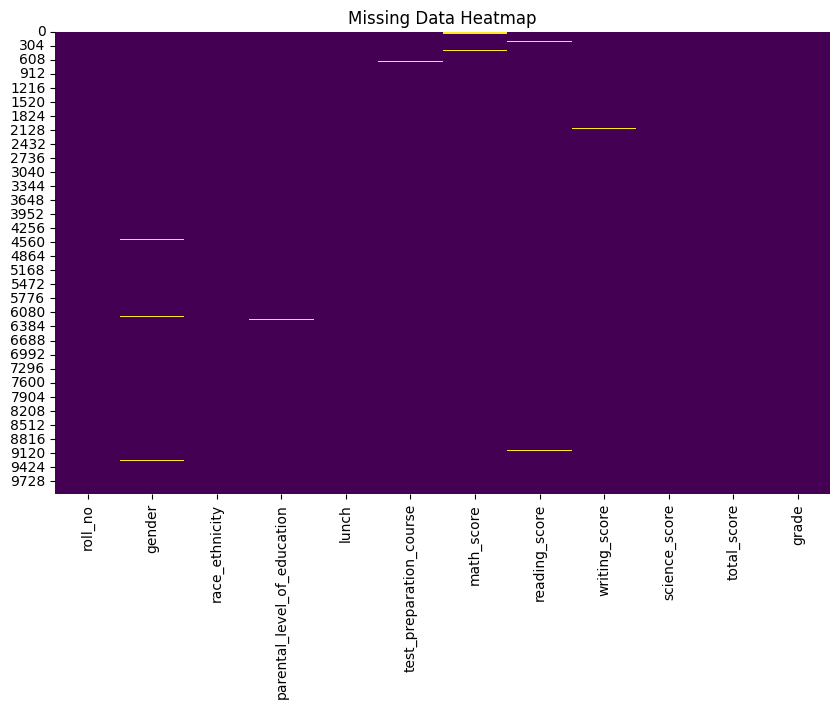

In [7]:
print("\nMissing values in each column:")
print(df.isnull().sum())
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()
df.fillna(df.mean(numeric_only=True), inplace=True)  # Mean for numeric columns
df.fillna("Unknown", inplace=True)  # Placeholder for categorical columns



In [8]:
print("\nNumber of duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)


Number of duplicate rows: 0


In [3]:
# Print unique values in categorical columns
print("\nUnique values in categorical columns:")
for column in df.select_dtypes(include=['object']).columns:
    print(column, ":", df[column].unique())

# Convert 'math_score' to numeric and handle NaN values
df['math_score'] = pd.to_numeric(df['math_score'], errors='coerce')
df['math_score'] = df['math_score'].fillna(df['math_score'].mean())  # Reassign the column

# Verify changes
print("\nProcessed math_score (first 5 rows):")
print(df['math_score'].head())



Unique values in categorical columns:
roll_no : ['std-01' 'std-02' 'std-03' ... 'std-9998' 'std-9999' 'std-10000']
gender : ['male' nan 'Boy' '\\tmale' 'female' 'Girl']
race_ethnicity : ['group D' 'group B' 'group C' 'group E' 'group A' 'A' nan 'C' 'D'
 'group C\\n' 'B' 'E']
parental_level_of_education : ['some college' 'high school' "master's degree" "associate's degree" nan
 'some high school' "bachelor's degree"]
math_score : ['89' '65' '10' '22' '26' '40' '34' '25' '28' '71' '55' nan '29' '18' '72'
 '23' '35' '38' '41' '44' '39' '85' '30' '100' '61' '47' '37' '49' '11'
 '32' '78' '36' '68' '97' '64' '60' '69' '87' '83' '42' '52' '27' '46'
 '12' '51' '75' '20' '81' '98' '24' '82' '19' '48' '74' '43' '62' '21'
 '93' '66' '0' '13' '45' '57' '54' '70' '50' '73' '88' '33' '76' '17' '16'
 '56' '80' '53' '14' '84' '58' '9' '8' '79' '77' '99' '67' '59' '63' '86'
 '31' '92' '94' '6' '91' '96' '95' '15' '90' '7' '4' '\\t41' '5']
grade : ['C' 'A' 'B' 'D' nan 'Fail']

Processed math_score (fi

In [15]:
if 'roll_no' in df.columns:
    df.drop(columns=['roll_no'], inplace=True)

In [20]:
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].astype('category')
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].astype(float)


Value counts for categorical columns:
gender :
 gender
female     4983
male       4982
Unknown      18
Girl         10
Boy           6
\tmale        1
Name: count, dtype: int64
race_ethnicity :
 race_ethnicity
group C      2921
group D      2566
group B      1899
group E      1509
group A      1062
Unknown        23
D               6
E               4
group C\n       4
C               3
A               2
B               1
Name: count, dtype: int64
parental_level_of_education :
 parental_level_of_education
some college          2272
high school           1987
associate's degree    1905
some high school      1742
bachelor's degree     1361
master's degree        711
Unknown                 22
Name: count, dtype: int64
grade :
 grade
B          5659
C          2701
A           904
D           671
Fail         62
Unknown       3
Name: count, dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


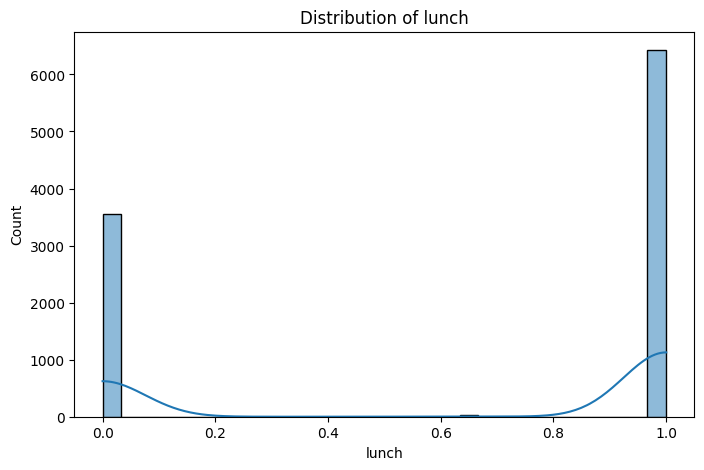

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


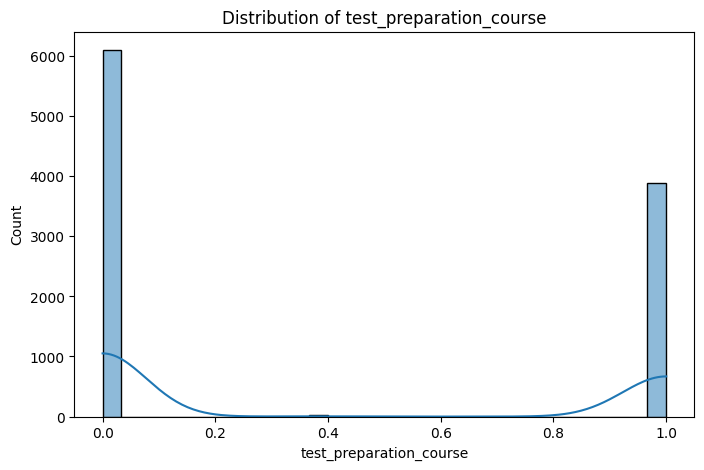

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


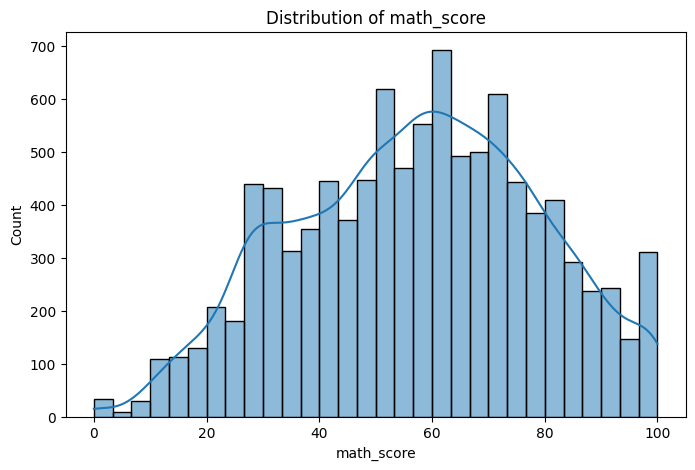

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


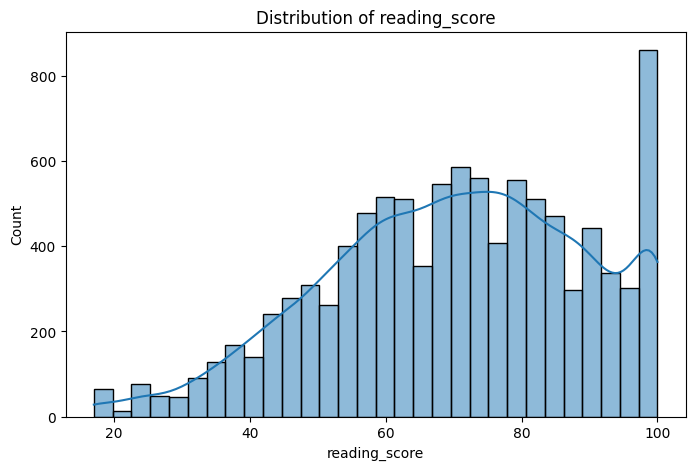

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


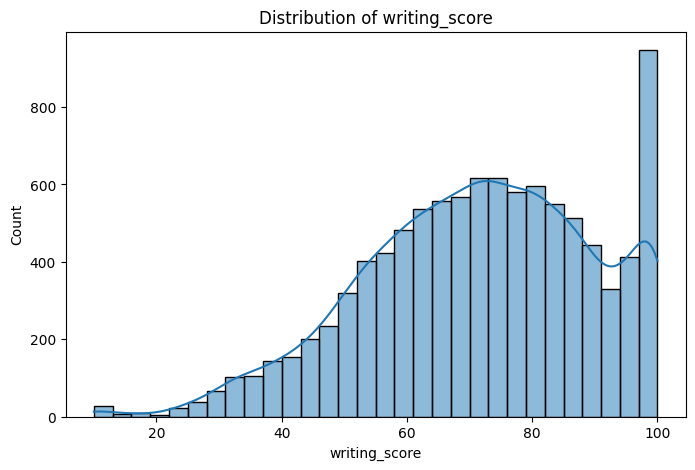

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


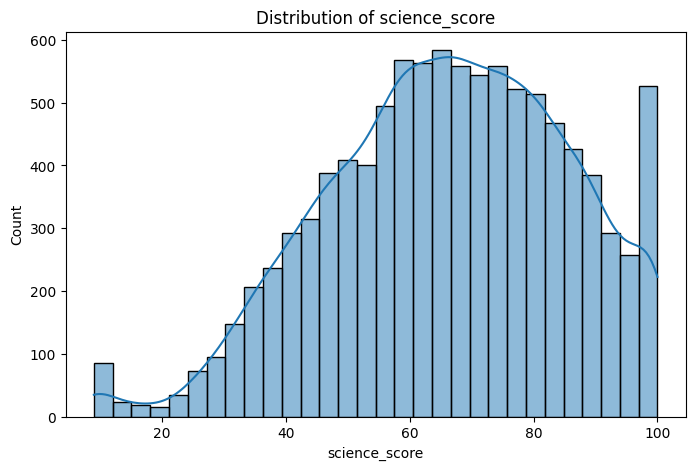

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


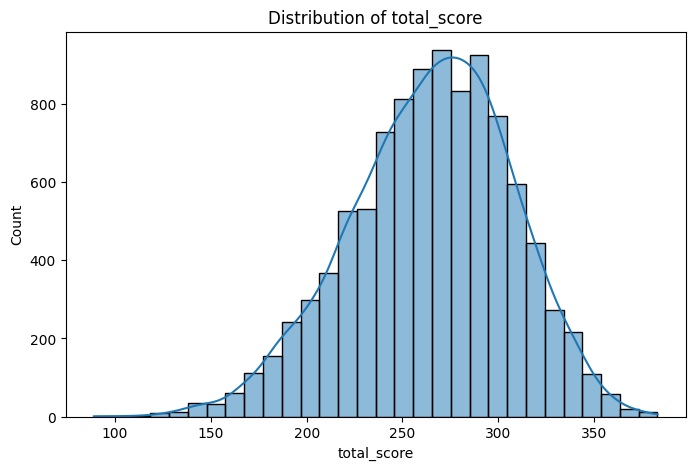

In [22]:
print("\nValue counts for categorical columns:")
for column in df.select_dtypes(include=['category']).columns:
    print(column, ":\n", df[column].value_counts())
for column in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f"Distribution of {column}")
    plt.show()

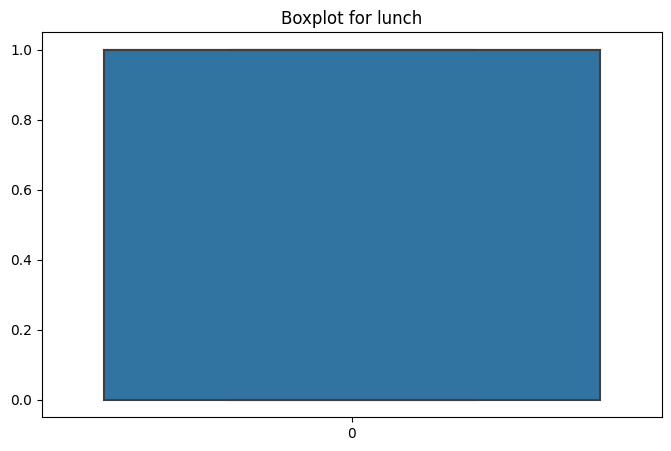

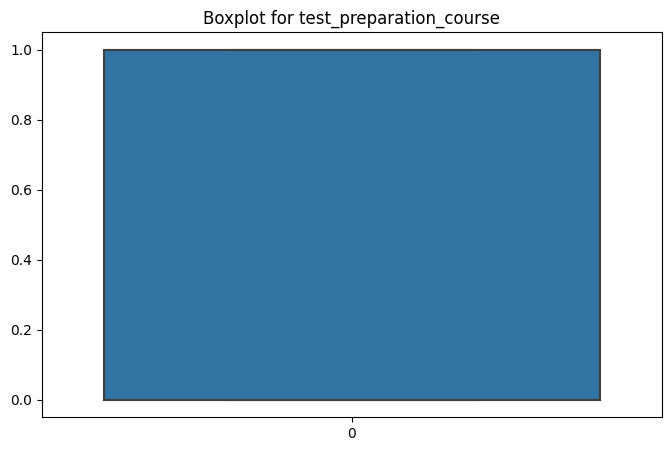

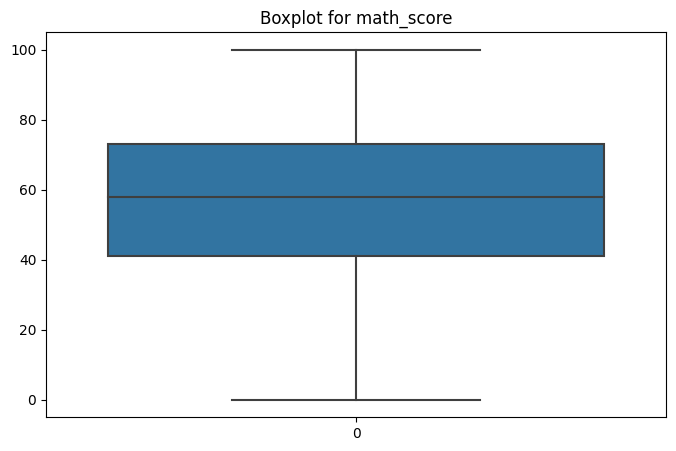

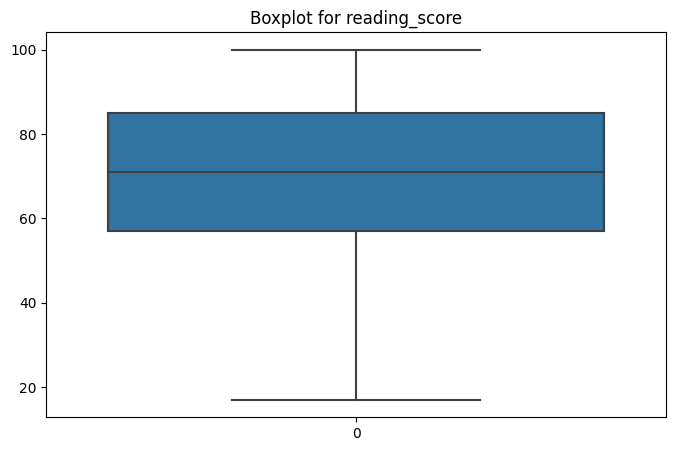

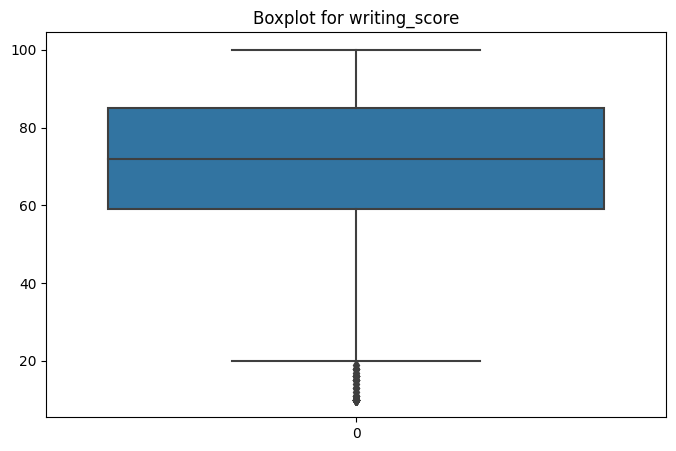

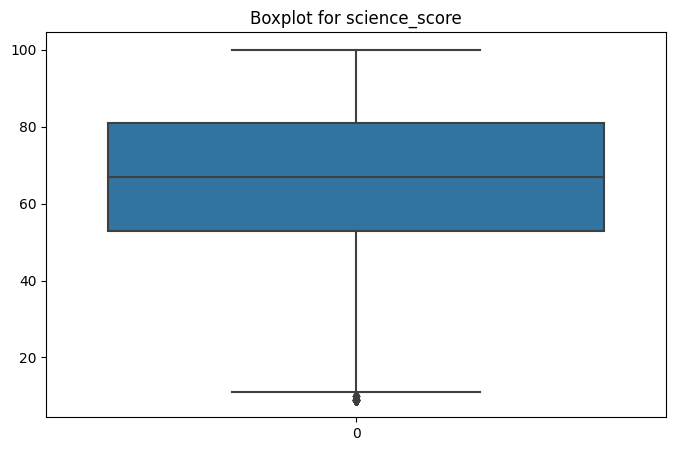

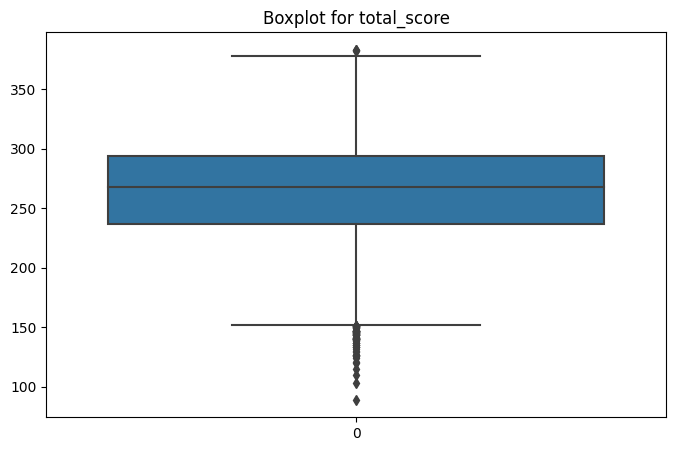

In [23]:
for column in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df[column])
    plt.title(f"Boxplot for {column}")
    plt.show()

In [25]:
df_encoded = pd.get_dummies(df, drop_first=True)


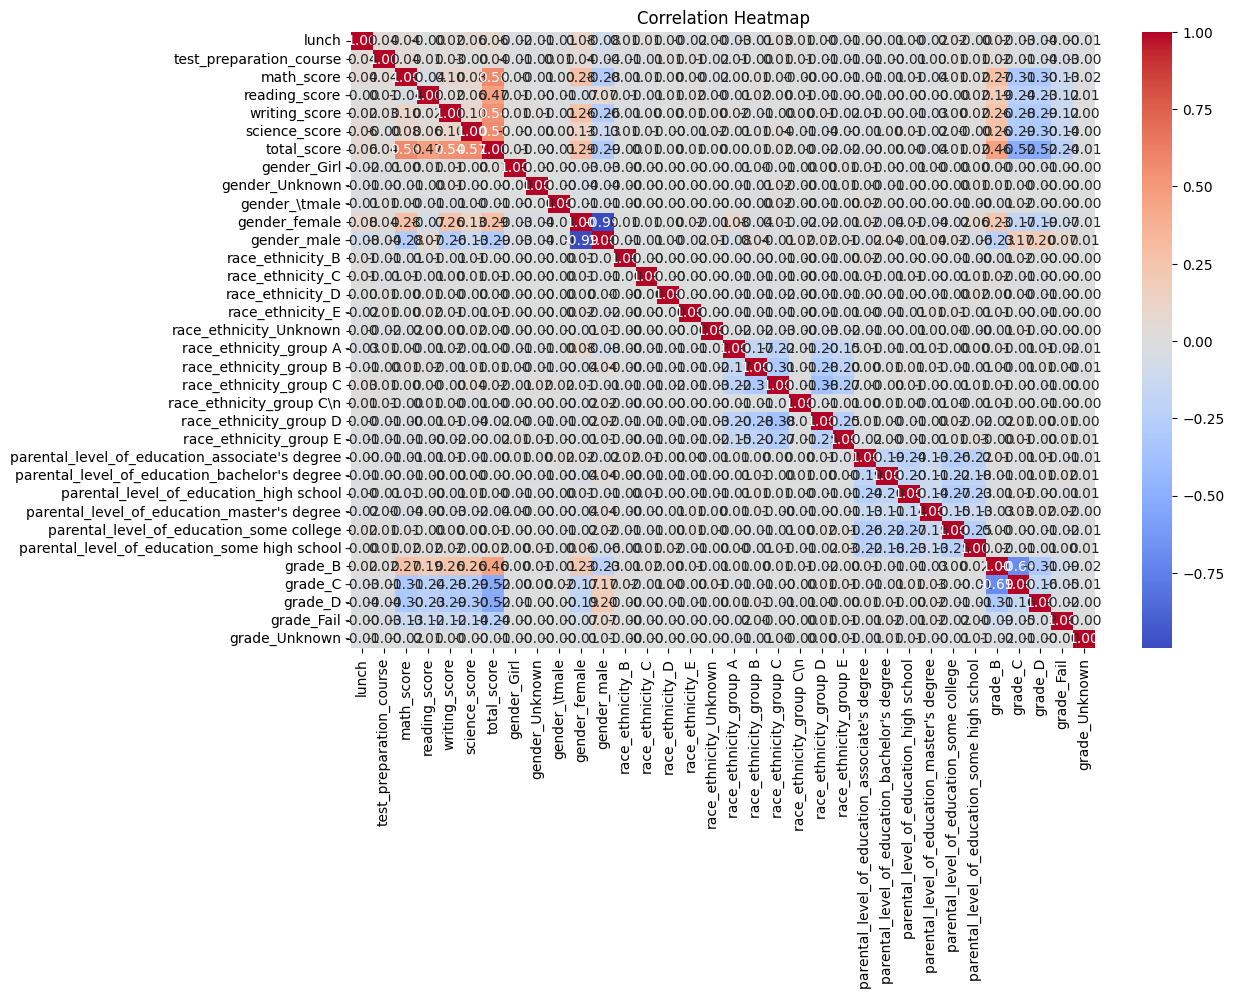

In [26]:
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

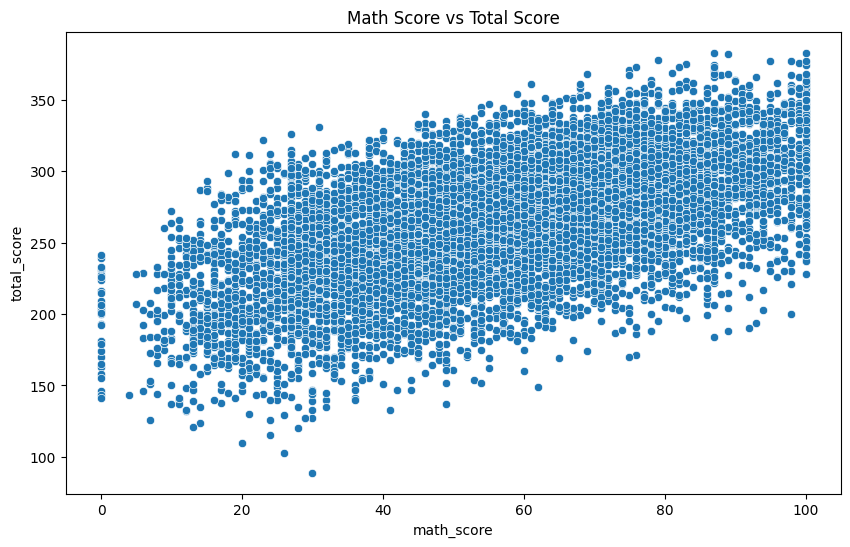

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


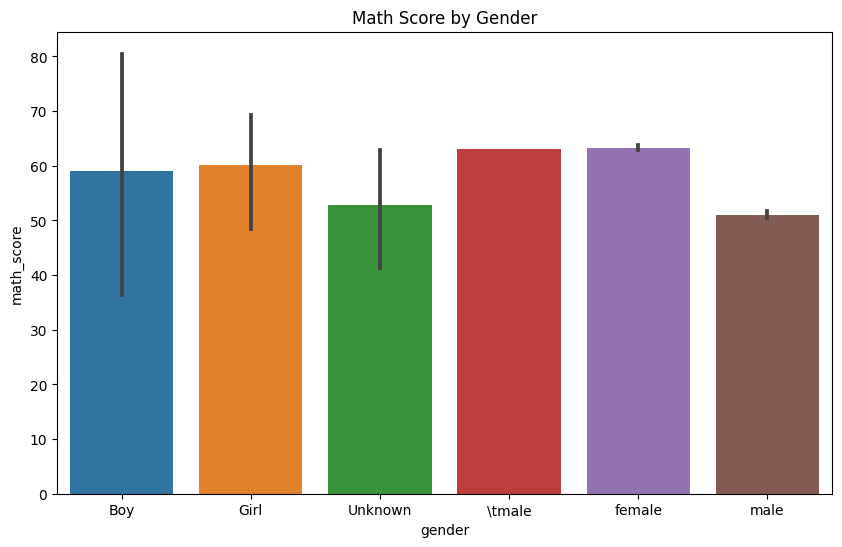

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='math_score', y='total_score')
plt.title("Math Score vs Total Score")
plt.show()
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='gender', y='math_score')
plt.title("Math Score by Gender")
plt.show()

In [31]:
df['performance_ratio'] = df['total_score'] / df['total_score'].max()
bins = [0, 0.5, 0.75, 1.0]
labels = ['Low', 'Medium', 'High']
df['performance_category'] = pd.cut(df['performance_ratio'], bins=bins, labels=labels)


In [32]:
print("\nSummary of Findings:")
print("- Dataset shape after processing:", df.shape)
print("- Example of processed data:\n", df.head())
print("- Key insights:")
print("  1. Performance ratio calculated for students.")
print("  2. Relationships between gender and math score analyzed.")


Summary of Findings:
- Dataset shape after processing: (10000, 13)
- Example of processed data:
   gender race_ethnicity parental_level_of_education  lunch  \
0   male        group D                some college    1.0   
1   male        group B                 high school    1.0   
2   male        group C             master's degree    1.0   
3   male        group D                some college    1.0   
4   male        group C                some college    0.0   

   test_preparation_course  math_score  reading_score  writing_score  \
0                      1.0        89.0           38.0           85.0   
1                      0.0        65.0          100.0           67.0   
2                      0.0        10.0           99.0           97.0   
3                      1.0        22.0           51.0           41.0   
4                      1.0        26.0           58.0           64.0   

   science_score  total_score grade  performance_ratio performance_category  
0           26.0  